In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
Data=pd.read_csv('/content/diabetes.csv')

In [5]:
Data
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
Data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## since in DF there is no null value in any of the column but the issue is we have the value as 0 (which is not null) but that doesn't make sense also, since BP cannot be 0 or skinthickness can not be 0.
## Therefore we need to perform Data imputation (filling the null values or empty values with some substitute values)

In [8]:
## checking for correlation between features
Data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


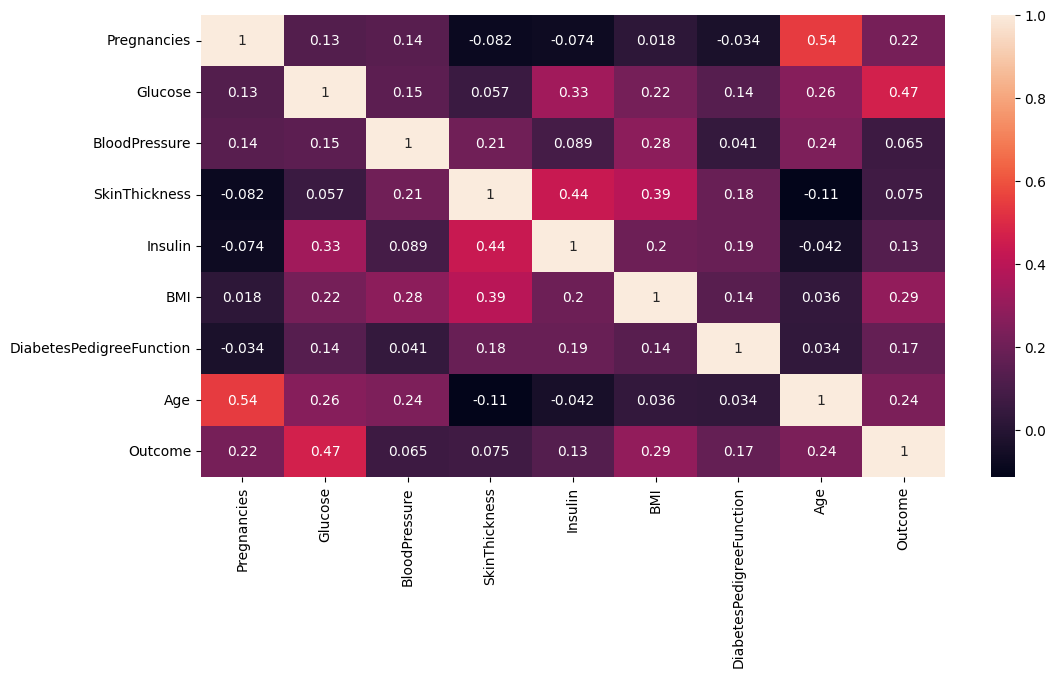

In [9]:
## graphically depicting the corr coefficient
plt.figure(figsize=(12,6))
sns.heatmap(Data.corr(),annot=True)
plt.show()

In [10]:
## describing the features
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Imputations

Making distplot with respect to each feature and based on the plot choose the approach to go ahead(mean or median)

<ipython-input-11-35ad5a4ea54f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

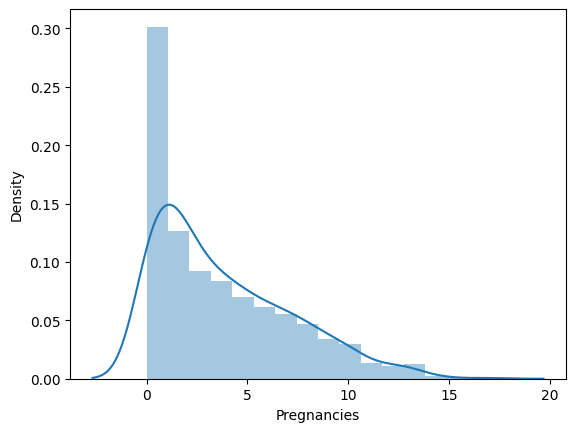

In [11]:
sns.distplot(Data.Pregnancies)
## it is right skewd there fore we are using median for impuataion

<ipython-input-12-456f7e10333e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Glucose)


<Axes: xlabel='Glucose', ylabel='Density'>

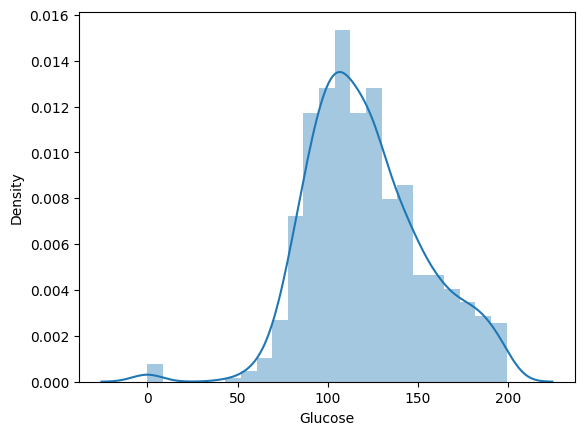

In [12]:
sns.distplot(Data.Glucose)
## Mean

<ipython-input-13-08cbc5df3d32>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.BloodPressure)


<Axes: xlabel='BloodPressure', ylabel='Density'>

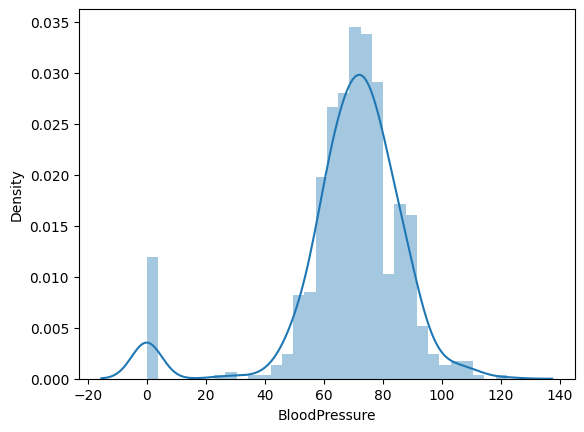

In [13]:
sns.distplot(Data.BloodPressure)
# mean

<ipython-input-14-60d4677783fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.SkinThickness)


<Axes: xlabel='SkinThickness', ylabel='Density'>

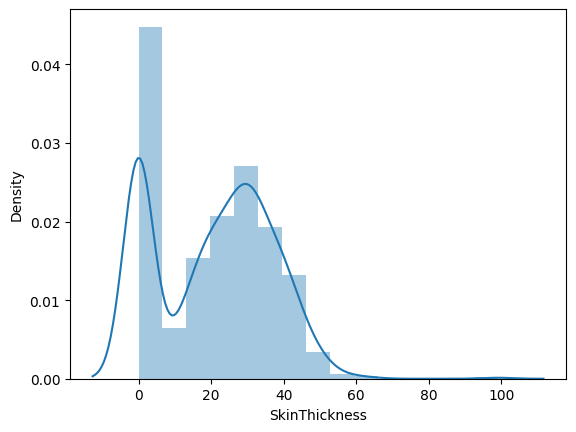

In [14]:
sns.distplot(Data.SkinThickness)
## median

<ipython-input-15-d99f95ea1963>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

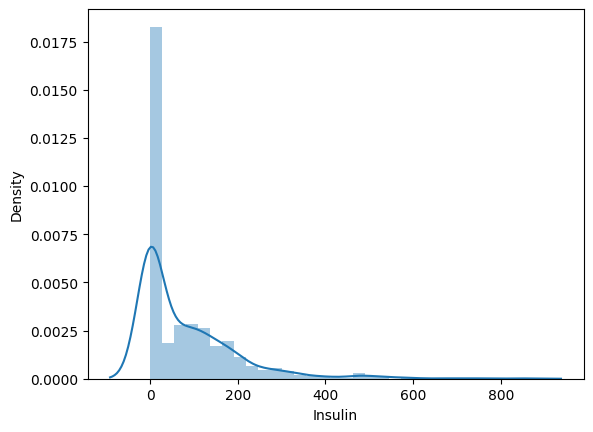

In [15]:
sns.distplot(Data.Insulin)
## median

<ipython-input-16-afc86904f895>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.BMI)


<Axes: xlabel='BMI', ylabel='Density'>

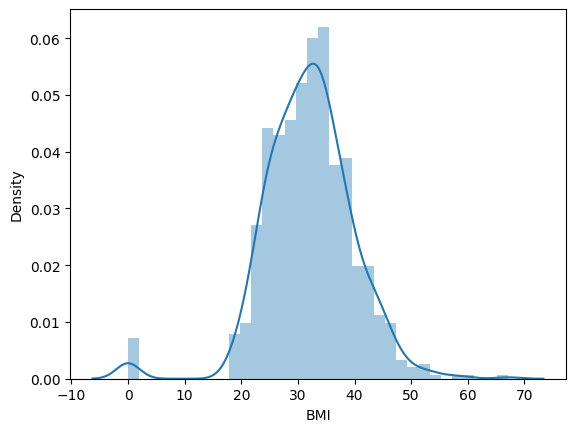

In [16]:
sns.distplot(Data.BMI)
# mean

<ipython-input-17-2e30e998820d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.DiabetesPedigreeFunction)


<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

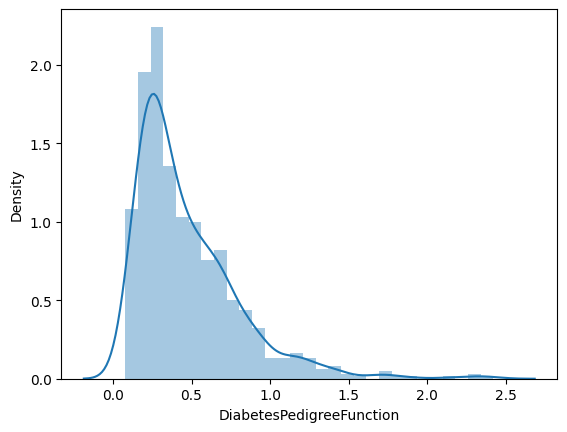

In [17]:
sns.distplot(Data.DiabetesPedigreeFunction)
# median

<ipython-input-18-e5879a6a684c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data.Age)


<Axes: xlabel='Age', ylabel='Density'>

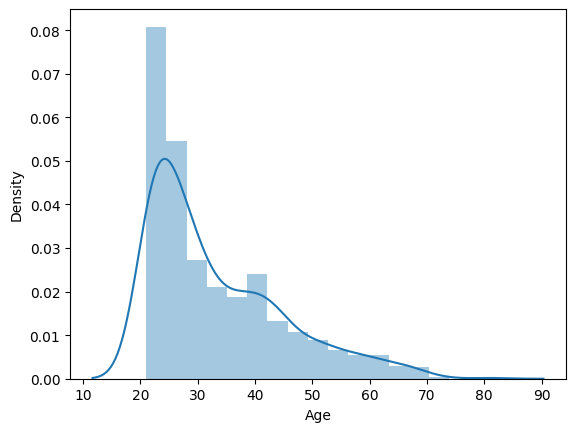

In [18]:
sns.distplot(Data.Age)
# median

## Performing imputations based on the distplot

In [19]:
Data['Pregnancies']=Data['Pregnancies'].replace(0,Data['Pregnancies'].median())

In [20]:
Data['Glucose']=Data['Glucose'].replace(0,Data['Glucose'].mean())

In [21]:
Data['BloodPressure']=Data['BloodPressure'].replace(0,Data['BloodPressure'].mean())

In [22]:
Data['SkinThickness']=Data['SkinThickness'].replace(0,Data['SkinThickness'].median())

In [23]:
Data['Insulin']=Data['Insulin'].replace(0,Data['Insulin'].median())

In [24]:
Data['BMI']=Data['BMI'].replace(0,Data['BMI'].mean())

In [25]:
Data['DiabetesPedigreeFunction']=Data['DiabetesPedigreeFunction'].replace(0,Data['DiabetesPedigreeFunction'].median())

In [26]:
Data['Age']=Data['Age'].replace(0,Data['Age'].median())

In [27]:
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,3,137.0,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27,30.5,36.8,0.340,27,0
765,5,121.0,72.0,23,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23,30.5,30.1,0.349,47,1


## Data Imputation : numerical data --> symm(mean) , unsymm(median)  and categorical data --> mode
## Median is more robust than mean in term of data impuatation ( because mean gets significantly impacted by outlier where as median does not get impacted, it cares about the value that is getting repeated many times)


### ***OULTLIERS DETECTION***
## by box-plot

In [28]:
## x -->; INPUT, y --> OUTPUT
x =Data.iloc[:,:-1] ## expecet the last column
y=Data.iloc[:,-1] ## last column only

In [29]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,3,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [30]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


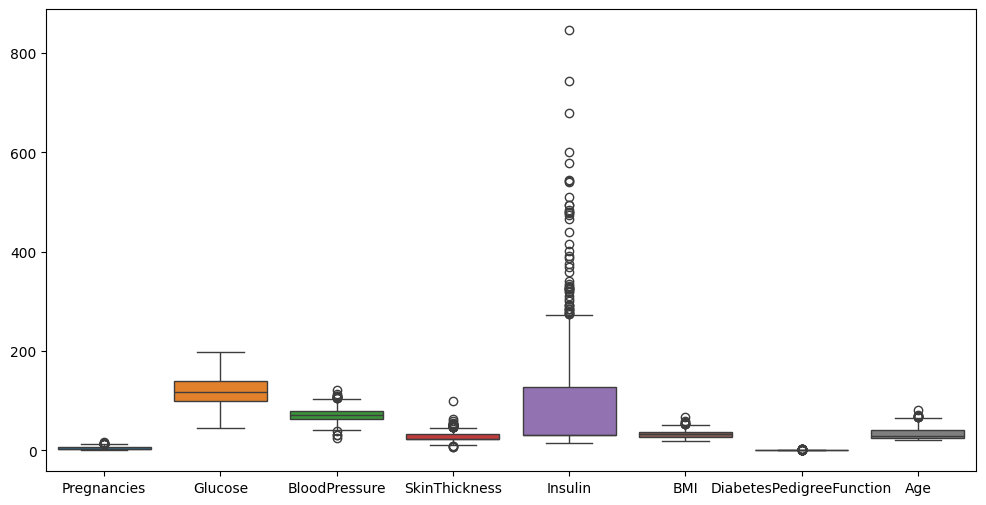

In [31]:
## BOX-PLOT
plt.figure(figsize=(12,6))
sns.boxplot(x)
plt.show()

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,3,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [33]:
## removing ouliers
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in cols:
  Q1=x[col].quantile(0.25)
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  mask=(x[col]>=lower_bound)&(x[col]<=upper_bound)

In [34]:
## Dataframe without outliers
x_outlier_detection=x[mask]
y_outlier_detection=y[mask]

In [35]:
x_outlier_detection

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,3,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


## Normalizing/ standardizing the data to reduce/nullify the effect of Biasness

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_normalized=scaler.fit_transform(x_outlier_detection)

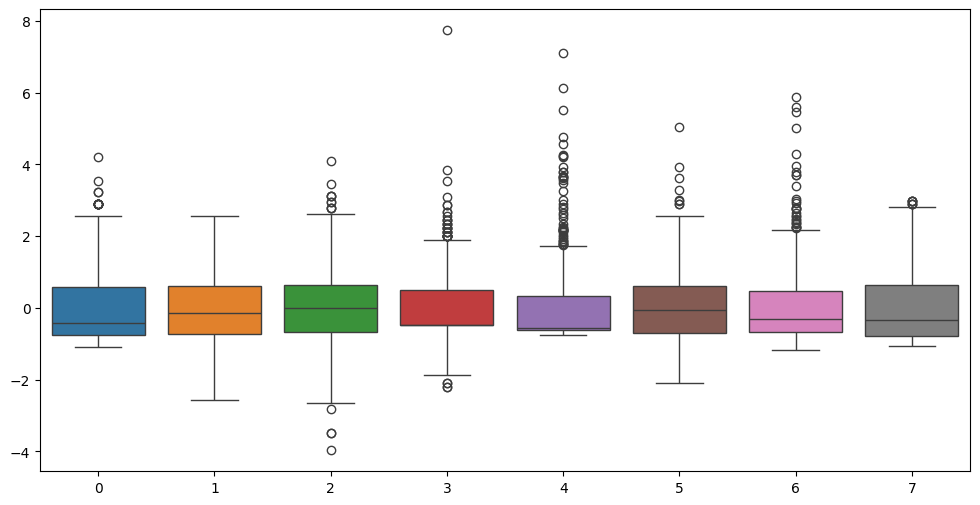

In [37]:
## normalized box-plot
## BOX-PLOT
plt.figure(figsize=(12,6))
sns.boxplot(x_normalized)
plt.show()

## even after performing oulier removal and after standardization we are facing the issue of the outliers, which we can see from above box-wisker plot

In [38]:
## in above box-plot the name of coulmns is not visible
x_normalized=pd.DataFrame(x_normalized,columns=cols)

In [39]:
x_normalized

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.573222,0.870083,-0.016984,0.822990,-0.612669,0.160901,0.468793,1.548281
1,-1.079800,-1.206570,-0.510935,0.175013,-0.612669,-0.858162,-0.361774,-0.162527
2,1.234430,2.023779,-0.675585,-0.472963,-0.612669,-1.338578,0.604211,-0.072485
3,-1.079800,-1.074719,-0.510935,-0.472963,-0.012978,-0.639792,-0.915485,-1.062953
4,-0.418591,0.507493,-2.651386,0.822990,0.685875,1.543915,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.895639,-0.679166,0.312316,2.226939,0.799202,0.058994,-0.903448,2.718835
755,-0.749196,0.013052,-0.181634,-0.040979,-0.612669,0.626758,-0.394876,-0.522698
756,0.242617,-0.019911,-0.016984,-0.472963,0.157014,-0.916395,-0.680760,-0.252570
757,-1.079800,0.144903,-1.004885,-0.472963,-0.612669,-0.348631,-0.367793,1.278154


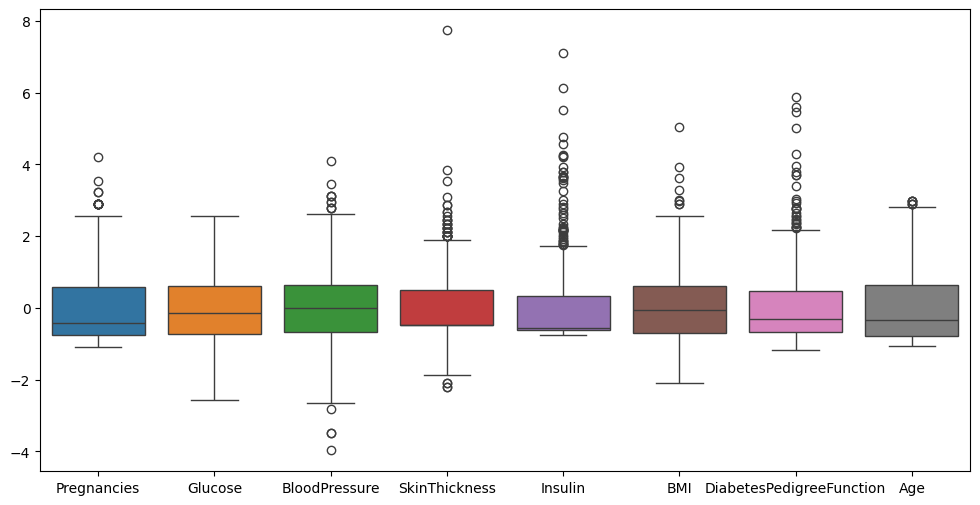

In [40]:
## now making the box-plot with column name
plt.figure(figsize=(12,6))
sns.boxplot(x_normalized)
plt.show()

## using quantile approach to remove the outliers further

In [41]:
x_normalized.reset_index(drop=True,inplace=True)
y_outlier_detection.reset_index(drop=True,inplace=True)
## in above step we reseted the indexing so that we won't face any type of error in below written code

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

x_new = x_normalized.copy()  # Start with a copy of the original DataFrame

for column in cols:
    q = x_normalized[column].quantile(0.99)  # 99th percentile
    mask=x_normalized[column]<q
    x_new = x_new[mask]  # Filter rows where column < q
    y_outlier_detection=y_outlier_detection[mask]

<ipython-input-41-2a5943dab247>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new = x_new[mask]  # Filter rows where column < q
<ipython-input-41-2a5943dab247>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new = x_new[mask]  # Filter rows where column < q
<ipython-input-41-2a5943dab247>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new = x_new[mask]  # Filter rows where column < q
<ipython-input-41-2a5943dab247>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new = x_new[mask]  # Filter rows where column < q
<ipython-input-41-2a5943dab247>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new = x_new[mask]  # Filter rows where column < q
<ipython-input-41-2a5943dab247>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_new = x_new[mask]  # Filter rows where column < q
<ipy

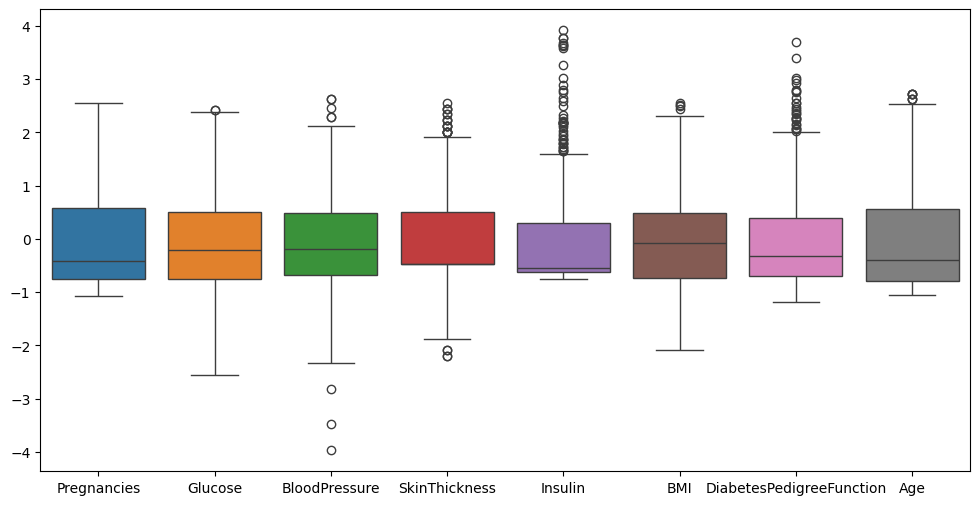

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x_new)
plt.show()

In [43]:
x_new.shape
## considerable shape becaue if we go with 0.95 we woulld have reach to 528 rows meaning lost of data, therefore we choose to go with 0.99

(698, 8)

# Model Training
1) Splitting the data into test and train

In [44]:
## splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_outlier_detection,test_size=0.33,random_state=42)

In [45]:
x_train.shape

(467, 8)

In [46]:
x_test.shape

(231, 8)

In [47]:
y_train.value_counts()

,count
Outcome,
0,300
1,167


## data Imbalancing(same no. of 0s and 1s are not present) can be seen here and this problem is very much common whenever  we work on hospital dataset.
1) oversampling{duplication of minority}
2) undersampling
3) SMOTE{generating synthetic minority points to increase it count}

In [48]:
## using SMOTE technique
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

In [49]:
x_train_resampled.shape

(600, 8)

In [50]:
y_train_resampled.value_counts()

,count
Outcome,
1,300
0,300


In [51]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()
classification.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

## Model prediction

In [52]:
y_pred=classification.predict(x_test)
print(y_pred)

[1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0]


In [53]:
## checking the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7705627705627706

In [54]:
from sklearn.metrics import classification_report
target_names=['non-diabetic','diabetics']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

non-diabetic       0.88      0.79      0.83       167
   diabetics       0.57      0.72      0.63        64

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.77      0.78       231



## for healthcare model recall is very much important

In [55]:
import pickle
pickle.dump(classification,open('classification_model.pkl','wb'))

In [56]:
model=pickle.load(open('classification_model.pkl','rb'))

In [57]:
model.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])